# A short notebook for averaging strike and dips for bedding corrections

In [3]:
import sys
#change to match where the PmagPy folder is on your computer
sys.path.insert(0, '/Users/taylorkilian/PmagPy')
import pmag,pmagplotlib,ipmag # import PmagPy functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplstereonet
%matplotlib inline

First, we take the bedding measurements from the Z87-Z85 stratagraphic section and put them in a table. These measurements were taken on individual planes and need to be averaged to derive an approximate tilt orientation for the entire section.

In [1]:
#strike_dip = [[129,34],[128,33],[139,37]]
strike_dip = [[132.2,34.6],[135,37],[148,39],[134,44]]

In [11]:
bedding_data = pd.DataFrame(strike_dip,columns=['strike','dip'])

In [12]:
bedding_data['pole_trend'] = bedding_data['strike']-90
bedding_data['pole_plunge'] = 90 - bedding_data['dip']
bedding_data

,strike,dip,pole_trend,pole_plunge
0,132.2,34.6,42.2,55.4
1,135.0,37.0,45.0,53.0
2,148.0,39.0,58.0,51.0
3,134.0,44.0,44.0,46.0


The best way to take the average of planes is to calculate the poles to each plane and take a mean of that "Fisherian" distribution. The plane perpendicular to the mean is the best average of the measured bedding planes.

In [13]:
bedding_poles = ipmag.make_di_block(bedding_data['pole_trend'],bedding_data['pole_plunge'])
bedding_poles_mean = pmag.fisher_mean(bedding_poles)
bedding_poles_mean

{'alpha95': 6.8383546169041676,
 'csd': 6.012472138921833,
 'dec': 47.35146305543455,
 'inc': 51.517588013746135,
 'k': 181.494673509813,
 'n': 4,
 'r': 3.983470589290667}

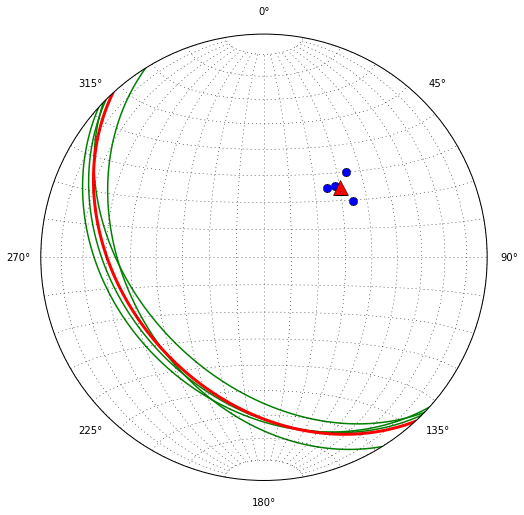

137.351463055 38.4824119863


In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

mean_strike = bedding_poles_mean['dec'] + 90.0
mean_dip = 90.0 - bedding_poles_mean['inc']

ax.plane(bedding_data['strike'],bedding_data['dip'], 'g-', linewidth=1.5)
ax.pole(bedding_data['strike'],bedding_data['dip'], 'bo', markersize=8)
ax.plane(mean_strike,mean_dip, 'r-', linewidth=3)
ax.pole(mean_strike,mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print mean_strike,mean_dip